In [66]:
import numpy as np

In [67]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [68]:
dataset = load_breast_cancer()

x = dataset.data
y = dataset.target

In [69]:
print(f"x-shape: {x.shape}")
print(f"y-shape: {y.shape}")

x-shape: (569, 30)
y-shape: (569,)


#### PCA for Feature Reduction

In [70]:
scaler = StandardScaler()
x_standard = scaler.fit_transform(x)

x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0)
print(f"mean: {x_mean}")
print(f"std: {x_std}")

x_ = (x - x_mean) / x_std

print(f"transformed: {x_standard[0]}")
print(f"own transformed: {x_[0]}")

mean: [1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02]
std: [3.52095076e+00 4.29725464e+00 2.42776193e+01 3.51604754e+02
 1.40517641e-02 5.27663291e-02 7.96497253e-02 3.87687325e-02
 2.73901809e-02 7.05415588e-03 2.77068942e-01 5.51163427e-01
 2.02007710e+00 4.54510134e+01 2.99987837e-03 1.78924359e-02
 3.01595231e-02 6.16486075e-03 8.25910439e-03 2.64374475e-03
 4.82899258e+00 6.14085432e+00 3.35730016e+01 5.68856459e+02
 2.28123569e-02 1.57198171e-01 2.08440875e-01 6.56745545e-02
 6.18130785e-02 1.80453893e-02]
transformed: [ 1.09706398 -2.07333501  1.26993369  0.9843749   1.568466

In [71]:
n_components = 3
pca = PCA(n_components=n_components, copy=True)
pca.fit(x_standard)

x_reduced = pca.transform(x_standard)

In [72]:
print(f"Components: {pca.components_}")
print(f"Explained Variance: {pca.explained_variance_}")
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Sum of Explained Variance Ratio: {sum(pca.explained_variance_ratio_)}")

Components: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016537 -0.0347675   0.19034877  0.36657548 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443046  0.23271589  0.19720728  0.13032156
   0.183848    0.28009202 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825723  0.14188335  0.27533947]
 [-0.00853123  0.06454989 -0.0093142   0.02869953 -0.10429169 -0.07409153
   0.00273378 -0.02556365 -0.04023993 -0.02257426  0.26848139  0.37463364
   0.26664535  0.21600658  0.30883889  0.15477999  0.17646383  0.22465743
   0.28858425  0.21150382

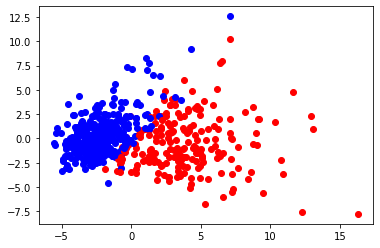

In [73]:
colors = ["red", "blue"]

for index, point in enumerate(x_reduced):
    cl = y[index]
    plt.scatter(point[0], point[1], color=colors[cl])
plt.show()